# Domain Analysis


### Riceleaf is the leaf of the Rice producing crop. Rice is stape food for large parts of this world, mostly grown and savoured in the asiatic regions.  

### The size and shape of rice and it's leaves will vary depending on the rice variety, environmental conditions, and stage of growth.

### As the rice plant matures, the leaves may change in color and exhibit different characteristics, especially if affected by diseases, pests, or environmental stressors.

### The riceleaves heath is essential to determine the health of the crop, so a regular monitering is essential to detect any diseases, problems caused by the insects.

### In this project we are motivated to handle the data to detect three imports issues to tackle the health of the rice leaves are
### (i) Bacterial leaf blight :  Primarily the plant is light green to greyish green and water-soaked streaks appear on the leaves but once it gets affected by the bacterial blight, they form larger yellowish lesions with uneven edges. Further, the leaves become yellow, gradually wilt and die.

### (ii) Brown spot : Its most observable damage is the numerous big spots on the leaves which can kill the whole leaf.

### (iii)Leaf smut : A widely distributed ,but somewhat minor,disease of rice. *The fungus produces slightly raised,angular ,black spots(sori)on both sides of leaves.
  
### The rice leaf Data contains a total of 119 Images, eqaully distributed among these three diseases.

## Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
from os import listdir
import keras
from keras.models import Sequential
from tensorflow.keras import layers, models
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = tf.keras.utils.image_dataset_from_directory(directory="/content/drive/MyDrive/PRCP-1001-RiceLeaf/Data",
                                                  labels='inferred',
                                                  label_mode='int',
                                                  class_names=None ,
                                                  color_mode='rgb',
                                                  image_size=(224,224),
                                                  seed=1)

Found 119 files belonging to 3 classes.


In [ ]:
# print class names

class_names = data.class_names
class_names

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

## Visualaizing Images

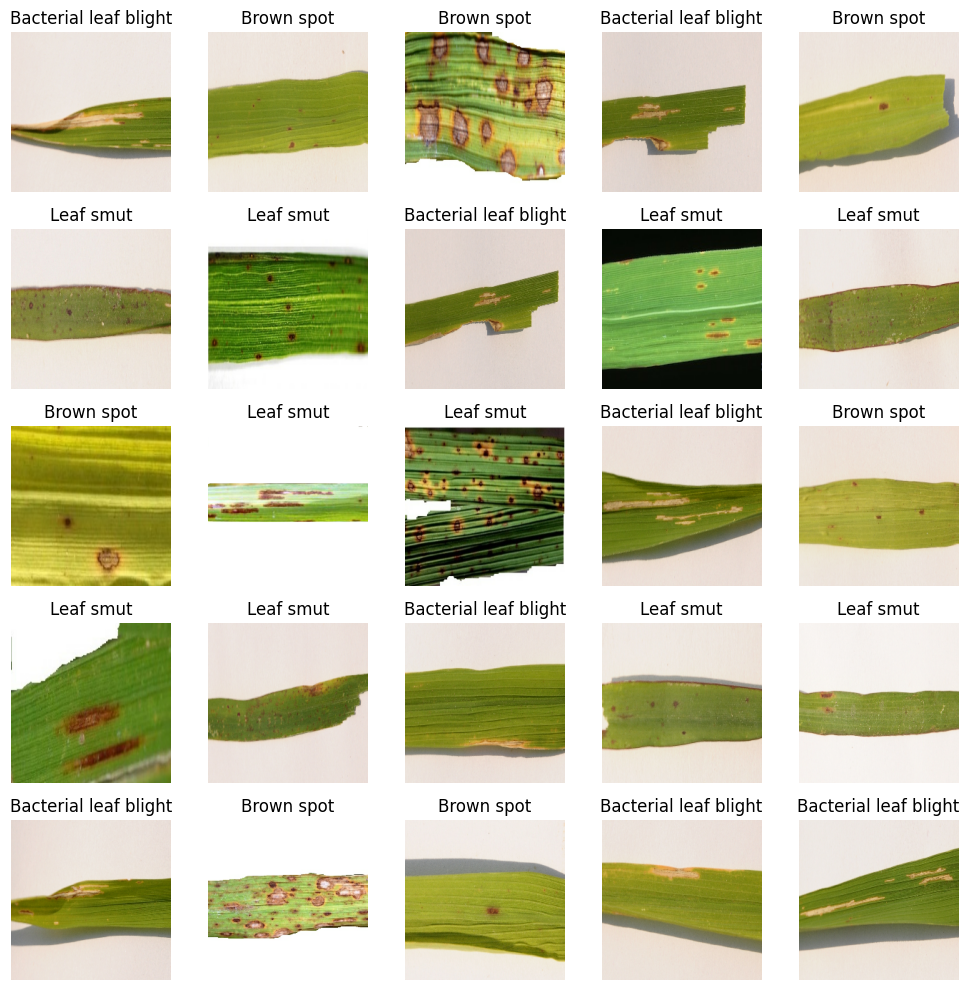

In [ ]:
plt.figure(figsize=(10,10))
for images , labels in data.take(1):
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')
    plt.tight_layout()

## Data Preprocessing

In [ ]:
# Create Dependent(y) and Independent(X) variable

X = []
y = []

for images , labels in data:
    X.append(images.numpy())
    y.append(labels.numpy())


# convert X , y list into numpy array

X = np.concatenate(X ,axis=0)
y = np.concatenate(y ,axis=0)

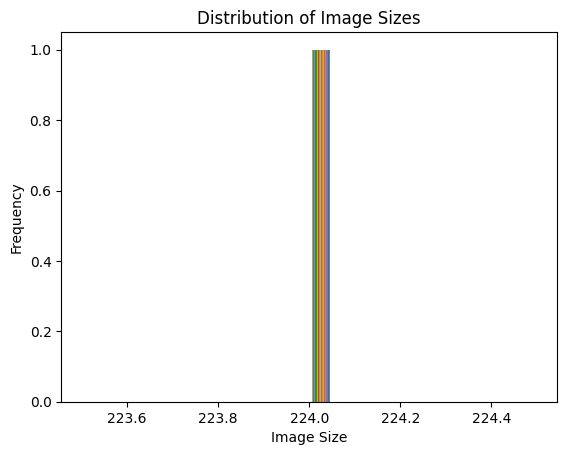

In [ ]:
image_sizes = [img.shape[:1] for img in X]

plt.hist(image_sizes, bins=20)
plt.xlabel('Image Size')
plt.ylabel('Frequency')
plt.title('Distribution of Image Sizes')
plt.show()

#### By above plot show the image frequency range by the image size should be in 224pixels

## Normalize the data

In [ ]:
X

array([[[[236.      , 225.      , 219.      ],
         [235.      , 225.      , 216.      ],
         [235.      , 224.      , 218.      ],
         ...,
         [239.94286 , 231.94286 , 228.94286 ],
         [238.06563 , 230.49835 , 225.87204 ],
         [238.      , 229.      , 224.      ]],

        [[236.      , 225.      , 219.      ],
         [235.      , 225.      , 216.      ],
         [234.88617 , 225.88617 , 218.88617 ],
         ...,
         [239.88623 , 232.88623 , 226.88623 ],
         [238.4399  , 230.4399  , 227.4399  ],
         [238.      , 229.      , 224.      ]],

        [[235.      , 225.      , 216.      ],
         [235.06438 , 224.55322 , 217.0867  ],
         [234.88617 , 225.88617 , 218.88617 ],
         ...,
         [237.83061 , 232.83061 , 226.83061 ],
         [238.      , 230.      , 227.      ],
         [236.31836 , 229.31836 , 223.31836 ]],

        ...,

        [[235.30443 , 225.30443 , 216.30443 ],
         [236.      , 225.      , 219.      ]

In [ ]:
# normalise / reshape image size in the range of [0,1] , for that devide each pixels by 255.

X = X.astype('float32')/255

In [ ]:
# Split data into train and test / validation

X_train, X_test = X[:100] ,X[100:]
y_train, y_test = y[:100] ,y[100:]

In [ ]:
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((100, 224, 224, 3), (19, 224, 224, 3), (100,), (19,))

In [ ]:
# Convert labels to one-hot encoding

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train ,len(class_names))
y_test = to_categorical(y_test ,len(class_names))

## Model Architecture

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D , Flatten ,Dense ,Dropout

### 1) relu - the usage of ReLU helps to prevent the exponential growth in the computation required to operate the neural network.
### 2) It has a derivative of either 0 or 1, depending on whether its input is negative or not.
### 3) Conv2D denotes creates a neural network layer with filters also.
### 4) MaxPooling is a kernal which only takes pixel higher intensity and size is reduced to half of the size of original image.
### 4) Droupot denotes neurons are deactivated to avoid overfitting.
### 5) Flatten denotes Coverting 2D data into 1D array
### 6) Output layer as neurons with 'softmax' as Activation Function (multi classifiaction problem)
### 7) Dense denotes it should be a normal ANN


# Defining Model


In [ ]:
model = Sequential()
model.add(Conv2D(filters=16 ,kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False ,input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(3,3)))
#16 filters with 3X3 kernel with padding size same as input and output

model.add(Conv2D(filters=32 ,kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(filters=64 ,kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(filters=128 , kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=256 , kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(300,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(3,activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      432       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 32)        4608      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        18432     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 64)          0

# Train the Model

### 1)Categorical-CrossEntrop : Use this when your labels are one-hot encoded. One-hot encoding means that each label is represented by a binary vector where all elements are zero except for the index corresponding to the class, which is marked with a one.

### 2) Adam optimizer : The Adam optimizer is a popular optimization algorithm used in training Convolutional Neural Networks (CNNs) and other deep learning models. It is an extension of the stochastic gradient descent (SGD) optimization algorithm and combines ideas from other optimization methods, such as RMSprop (Root Mean Square Propagation) and momentum.
### The Adam optimizer is known for its efficiency and robustness. It often performs well "out of the box" and requires less manual tuning of hyperparameters compared to traditional SGD.


### 3) metrics=['accuracy'] : During training and evaluation, the accuracy metric will be calculated.


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# optimizer='adam' : The Adam optimizer is used for optimization during training.
# loss='categorical_crossentropy'
# metrics=['accuracy'] : During training and evaluation, the accuracy metric will be calculated.

In [ ]:
# we are assigning the checkpointer for save the model with val_accuracy
from keras.callbacks import ModelCheckpoint
check_pointer = ModelCheckpoint(filepath='model.weights.best.hdf5' ,
                                save_best_only=True ,
                                mode='auto' ,
                                monitor='val_accuracy' )

In [ ]:
# Train the model

history = model.fit(X_train,y_train,batch_size=32 ,epochs=60 ,validation_data=(X_test,y_test) ,callbacks=[check_pointer] ,verbose=1 ,shuffle=True)

Epoch 1/60
4/4 [==============================] - 12s 246ms/step - loss: 1.1177 - accuracy: 0.2600 - val_loss: 1.1343 - val_accuracy: 0.1579
Epoch 2/60
4/4 [==============================] - 0s 38ms/step - loss: 1.0907 - accuracy: 0.3700 - val_loss: 1.1116 - val_accuracy: 0.1579
Epoch 3/60
4/4 [==============================] - 0s 47ms/step - loss: 1.1046 - accuracy: 0.2600 - val_loss: 1.0974 - val_accuracy: 0.5263
Epoch 4/60
4/4 [==============================] - 0s 37ms/step - loss: 1.1063 - accuracy: 0.2900 - val_loss: 1.1180 - val_accuracy: 0.1579
Epoch 5/60
4/4 [==============================] - 0s 37ms/step - loss: 1.0918 - accuracy: 0.3800 - val_loss: 1.1196 - val_accuracy: 0.1579
Epoch 6/60
4/4 [==============================] - 0s 34ms/step - loss: 1.0904 - accuracy: 0.3800 - val_loss: 1.1145 - val_accuracy: 0.1579
Epoch 7/60
4/4 [==============================] - 0s 35ms/step - loss: 1.0923 - accuracy: 0.3900 - val_loss: 1.1174 - val_accuracy: 0.1579
Epoch 8/60
4/4 [=========

In [ ]:
model.load_weights('/content/model.weights.best.hdf5')

## Predict the Model

In [ ]:
# make prediction for X_test

y_prediction = model.predict(X_test)

leaf_class = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

1/1 [==============================] - 0s 114ms/step


In [ ]:
# get the predicted class for each sample
predicted_classes = np.argmax(y_prediction, axis=1)
print(predicted_classes)

[1 1 2 0 1 1 1 0 1 2 1 1 0 1 2 0 0 2 1]


## Visualize the Predicted classes with True classes

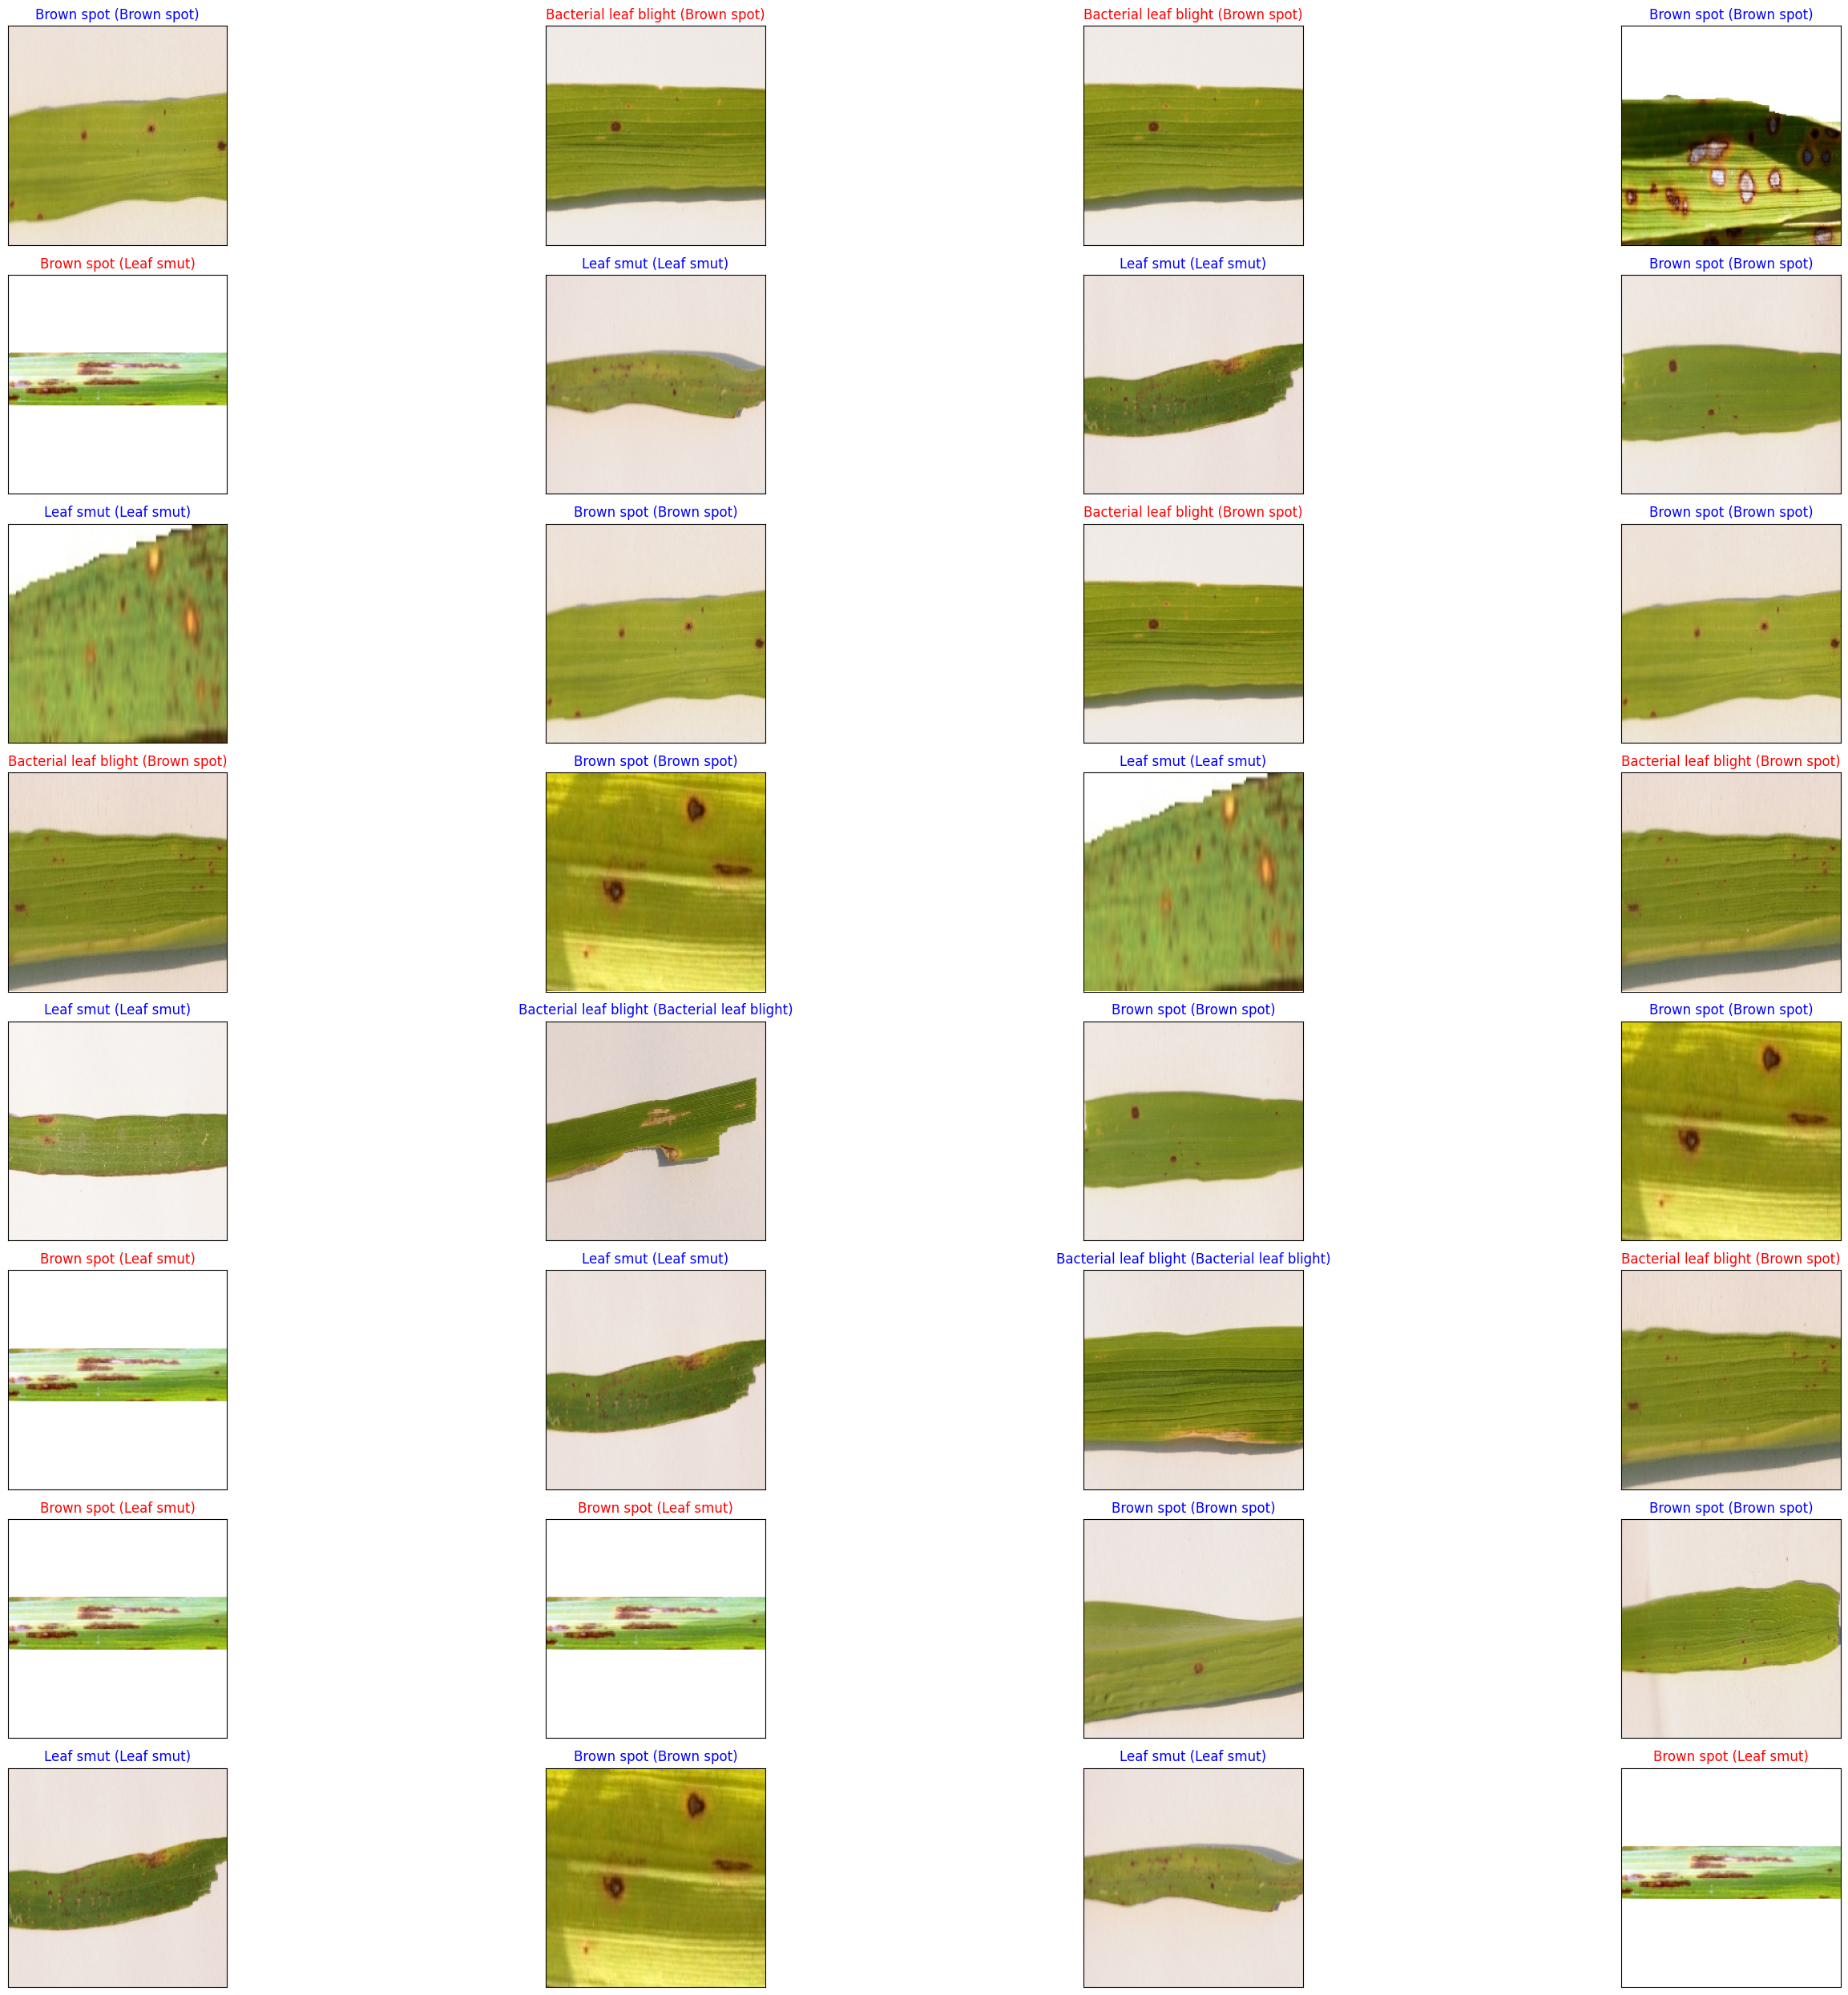

In [ ]:
# Assuming you have 'y_prediction' for predictions and 'y_test' for ground truth
# Assuming 'leaf_class' is a list of class labels

# Plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(30, 25))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=32, replace=True)):
    ax = fig.add_subplot(8, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))

    # Assuming 'y_prediction' contains the model predictions
    pred_idx = np.argmax(y_prediction[idx])

    true_idx = np.argmax(y_test[idx])

    ax.set_title("{} ({})".format(leaf_class[pred_idx], leaf_class[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

plt.tight_layout()

## Evaluate Model's Performance

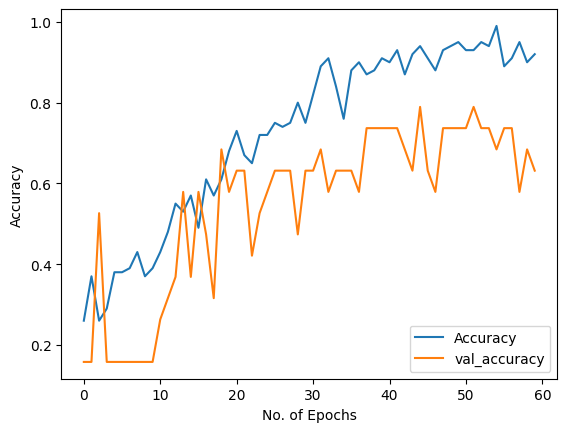

In [ ]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'] ,label='val_accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")

In [ ]:
# print Accuracy

test_Accuracy = model.evaluate(X_test,y_test)
print(f"Model's Accuracy : {test_Accuracy[1]*100}")

1/1 [==============================] - 0s 41ms/step - loss: 0.9828 - accuracy: 0.7895
Model's Accuracy : 78.94737124443054


### By Above CNN model gives with an accuracy of 78%

## Applying the Hyper Parameter Tuning On CNN

In [ ]:

model_hp = Sequential()
model_hp.add(Conv2D(filters=16 ,kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False ,input_shape=(224,224,3)))
#16 filters with 3X3 kernel with padding size same as input and output

model_hp.add(Conv2D(filters=32 ,kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model_hp.add(MaxPooling2D(pool_size=(3,3)))

model_hp.add(Conv2D(filters=64 ,kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model_hp.add(MaxPooling2D(pool_size=(3,3)))

model_hp.add(Conv2D(filters=128 , kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model_hp.add(MaxPooling2D(pool_size=(2,2)))

model_hp.add(Conv2D(filters=256 , kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model_hp.add(MaxPooling2D(pool_size=(2,2)))

model_hp.add(Dropout(0.3)) # 30% neurons are deactivated to avoid overfitting
model_hp.add(Flatten())    # Coverting data into 1D array
model_hp.add(Dropout(0.5)) # 50% neurons are deactivated to avoid overfitting
model_hp.add(Dense(300,activation='relu'))
model_hp.add(Dense(100,activation='relu')) #100 neurons with relu AF
model_hp.add(Dense(3,activation='softmax')) # 3 output layers as neurons with softmax AF(multi classifiaction)


model_hp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 224, 224, 16)      432       
                                                                 
 conv2d_6 (Conv2D)           (None, 224, 224, 32)      4608      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 74, 74, 64)        18432     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 24, 24, 128)      

In [ ]:
#hyperparameter tuning -Learning Rate
learning_rate = 0.0001
optimizer = Adam(learning_rate=learning_rate)

In [ ]:
model_hp.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint
check_pointer1 = ModelCheckpoint(filepath='model.weights.best.hdf6' ,
                                save_best_only=True ,
                                mode='auto' ,
                                monitor='val_accuracy' )

In [ ]:
history1 = model_hp.fit(X_train,y_train,batch_size=32 ,epochs=60 ,validation_data=(X_test,y_test) ,callbacks=[check_pointer1] ,verbose=1 ,shuffle=True)

Epoch 1/60
4/4 [==============================] - 6s 1s/step - loss: 1.0995 - accuracy: 0.3600 - val_loss: 1.1187 - val_accuracy: 0.1579
Epoch 2/60
4/4 [==============================] - 2s 595ms/step - loss: 1.1031 - accuracy: 0.3600 - val_loss: 1.0976 - val_accuracy: 0.3684
Epoch 3/60
4/4 [==============================] - 0s 70ms/step - loss: 1.0967 - accuracy: 0.3700 - val_loss: 1.1148 - val_accuracy: 0.1579
Epoch 4/60
4/4 [==============================] - 0s 70ms/step - loss: 1.0900 - accuracy: 0.3700 - val_loss: 1.1443 - val_accuracy: 0.1579
Epoch 5/60
4/4 [==============================] - 0s 69ms/step - loss: 1.0847 - accuracy: 0.3800 - val_loss: 1.1604 - val_accuracy: 0.1579
Epoch 6/60
4/4 [==============================] - 0s 70ms/step - loss: 1.0898 - accuracy: 0.3700 - val_loss: 1.2037 - val_accuracy: 0.1579
Epoch 7/60
4/4 [==============================] - 0s 73ms/step - loss: 1.0917 - accuracy: 0.3700 - val_loss: 1.2524 - val_accuracy: 0.1579
Epoch 8/60
4/4 [============

In [ ]:
model_hp.load_weights('/content/model.weights.best.hdf6')

In [ ]:
y_prediction1 = model_hp.predict(X_test)

leaf_class = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

# get the predicted class for each sample
predicted_classes1 = np.argmax(y_prediction1, axis=1)
print(predicted_classes1)

1/1 [==============================] - 0s 130ms/step
[1 2 2 1 1 1 1 1 1 2 1 1 0 1 2 0 1 1 1]


### Evaluating Tuning Model Performance

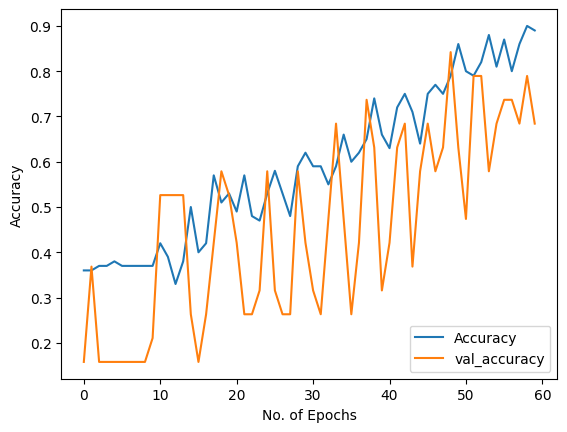

In [ ]:
plt.plot(history1.history['accuracy'],label='Accuracy')
plt.plot(history1.history['val_accuracy'] ,label='val_accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")

In [ ]:
test_Accuracy1 = model_hp.evaluate(X_test,y_test)
print(f"Model's Accuracy : {test_Accuracy1[1]*100}")

1/1 [==============================] - 0s 99ms/step - loss: 0.6247 - accuracy: 0.8421
Model's Accuracy : 84.21052694320679


## By the above hyper parameter CNN Model gives awith an accuracy of 84%


## Visualize the Predicted Classes

In [ ]:
fig = plt.figure(figsize=(30, 25))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=32, replace=True)):
    ax = fig.add_subplot(8, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))

    # Assuming 'y_prediction1' contains the model predictions
    pred_idx = np.argmax(y_prediction1[idx])

    true_idx = np.argmax(y_test[idx])

    ax.set_title("{} ({})".format(leaf_class[pred_idx], leaf_class[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

plt.tight_layout()

## Data Augmentation

### Visualizing Augmented Images:
### We visualize augmented images to ensure they still represent the original classes has to be done in Data visualisation section

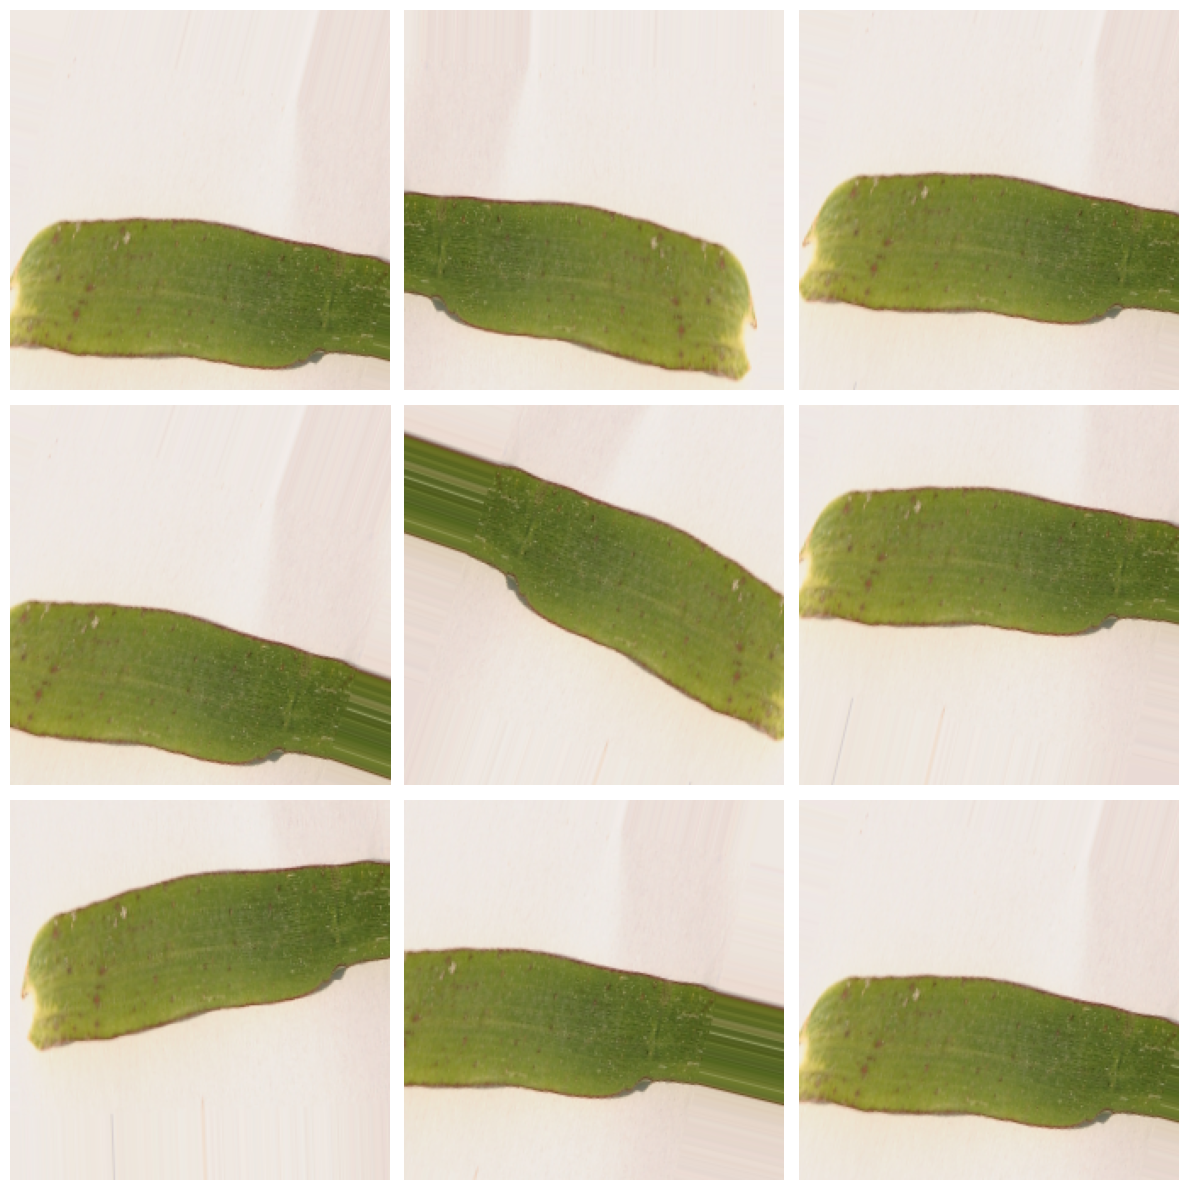

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

sample_image = X[2]
sample_image = np.expand_dims(sample_image, axis=0)

plt.figure(figsize=(12, 12))
for i, augmented_image in enumerate(data_generator.flow(sample_image, batch_size=1)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis('off')
    if i == 8:
        break
plt.tight_layout()
plt.show()

### Data Augmentation Model

In [ ]:
model_hp1 = Sequential()
model_hp1.add(Conv2D(filters=16 ,kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False ,input_shape=(224,224,3)))
model_hp1.add(MaxPooling2D(pool_size=(3,3)))

model_hp1.add(Conv2D(filters=32 ,kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model_hp1.add(MaxPooling2D(pool_size=(3,3)))

model_hp1.add(Conv2D(filters=64 ,kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model_hp1.add(MaxPooling2D(pool_size=(3,3)))

model_hp1.add(Conv2D(filters=128 , kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model_hp1.add(MaxPooling2D(pool_size=(2,2)))

model_hp1.add(Conv2D(filters=256 , kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model_hp1.add(MaxPooling2D(pool_size=(2,2)))

model_hp1.add(Dropout(0.3))
model_hp1.add(Flatten())
model_hp1.add(Dropout(0.5))
model_hp1.add(Dense(300,activation='relu'))
model_hp1.add(Dense(100,activation='relu'))
model_hp1.add(Dense(3,activation='softmax'))


model_hp1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 224, 224, 16)      432       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 74, 74, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 74, 74, 32)        4608      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 24, 24, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 24, 24, 64)        18432     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 8, 8, 64)         

In [ ]:
model_hp1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint
check_pointer2 = ModelCheckpoint(filepath='model.weights.best.hdf7' ,
                                save_best_only=True ,
                                mode='auto' ,
                                monitor='val_accuracy' )

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

### 1) roation_angle - an angle where the image is rotated and the algorithm is run. it goes from -45 to +45(exampe)
### 2) width& height_shift_range - randomly shifting the image horizontally and vertically. This helps the model tolerate small translations in the input data.
### 3) shear_range - maximum range of shear on the axis
### 4) fill_mode - "nearest," "constant," "reflect," and "wrap."

In [ ]:
augmented_data = datagen.flow(X_train, y_train, batch_size=32)

In [ ]:
history2 = model_hp1.fit(augmented_data, epochs=60, steps_per_epoch=len(X_train) // 32, validation_data=(X_test, y_test), callbacks=[check_pointer2], verbose=1, shuffle=True)

Epoch 1/60
3/3 [==============================] - 4s 854ms/step - loss: 1.1101 - accuracy: 0.3382 - val_loss: 1.1494 - val_accuracy: 0.1579
Epoch 2/60
3/3 [==============================] - 2s 934ms/step - loss: 1.1002 - accuracy: 0.3529 - val_loss: 1.0963 - val_accuracy: 0.5263
Epoch 3/60
3/3 [==============================] - 1s 235ms/step - loss: 1.0982 - accuracy: 0.2794 - val_loss: 1.1009 - val_accuracy: 0.3684
Epoch 4/60
3/3 [==============================] - 1s 370ms/step - loss: 1.1012 - accuracy: 0.3235 - val_loss: 1.1327 - val_accuracy: 0.1579
Epoch 5/60
3/3 [==============================] - 2s 429ms/step - loss: 1.0927 - accuracy: 0.4118 - val_loss: 1.1780 - val_accuracy: 0.1579
Epoch 6/60
3/3 [==============================] - 2s 432ms/step - loss: 1.1137 - accuracy: 0.3382 - val_loss: 1.1950 - val_accuracy: 0.1579
Epoch 7/60
3/3 [==============================] - 1s 222ms/step - loss: 1.1008 - accuracy: 0.3676 - val_loss: 1.1995 - val_accuracy: 0.1579
Epoch 8/60
3/3 [====

In [ ]:
model_hp1.load_weights('/content/model.weights.best.hdf7')

### Evaluating Data Augmentation model performance

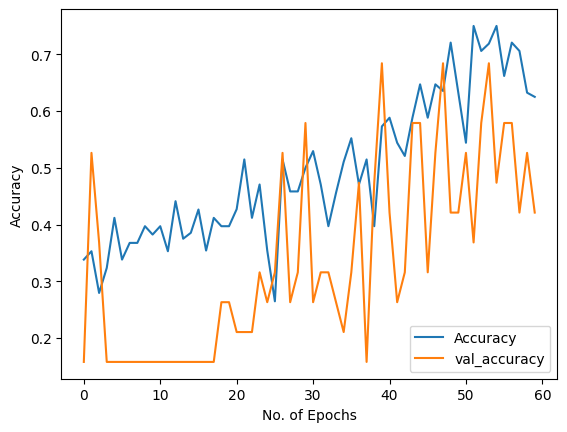

In [ ]:
plt.plot(history2.history['accuracy'],label='Accuracy')
plt.plot(history2.history['val_accuracy'] ,label='val_accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")

In [ ]:
test_Accuracy2 = model_hp1.evaluate(X_test,y_test)
print(f"Model's Accuracy : {test_Accuracy2[1]*100}")

1/1 [==============================] - 0s 33ms/step - loss: 0.9736 - accuracy: 0.6842
Model's Accuracy : 68.42105388641357


### By above Data Augmentation model gives with an accuracy of 68%

## By Using the MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier

x_train_flattened = X_train.reshape(X_train.shape[0], -1)
x_test_flattened = X_test.reshape(X_test.shape[0], -1)

model_mlp = MLPClassifier(hidden_layer_sizes=(100,3),
                          learning_rate_init=0.0001,
                          max_iter=75,
                          random_state=12)

model_mlp.fit(x_train_flattened, y_train)

MLPClassifier(hidden_layer_sizes=(100, 3), learning_rate_init=0.0001,
              max_iter=75, random_state=12)

In [ ]:

from sklearn.metrics import classification_report

y_pred = model_mlp.predict(x_test_flattened)
class_report = classification_report(y_test, y_pred, target_names=leaf_class)

print(class_report)

                       precision    recall  f1-score   support

Bacterial leaf blight       0.16      1.00      0.27         3
           Brown spot       0.00      0.00      0.00        10
            Leaf smut       0.32      1.00      0.48         6

            micro avg       0.24      0.47      0.32        19
            macro avg       0.16      0.67      0.25        19
         weighted avg       0.12      0.47      0.19        19
          samples avg       0.24      0.47      0.32        19



##Model Comparision
### 1) Main CNN model provides a accuracy of 73%.
### 2) Hyper parameter tuning model, Learning rate of 0.0001 provides 84% accuracy and it deterioates when the learning rate increases.
### 3) Data Augmentation model provides 68% accuracy
### 4) MLP was unable to identify all the disease classifications.
### 5) In conclusion CNN with Hyper parameter tuning model provides the best possible result.

## Challenges Faced
### 1) The dataset is limited, train and testing is limited aswell.
### 2) Limited knowledge on Deep learning algorithms to implement on Image processing.
### 3) Image shape, array and convertion error was hard to understand, and it took a certain amount of time to understand the code and implement the data
### 4) When compiling the model, the optimizer, loss and metrics has to be fixed when changed there is an error in the output.
### 5) loss = categorical_entropy, when just categorical_entropy is used there is an error in output and distrupts the flow process as our labels are one hot encoded for multi classes.
### 6) Applying Data Augmentation is also hard to understand,implemented on the data
### 7) In hyperparameter tuning, MLP can only identify two class, when the inout are changed the class identification varies but stil identifies only two class.
### 8) With limited dataset various models and hyperparameters were not able to be implemented as testing and validation data is required more.